#loading packages and connecting to drive

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
#Importing libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [97]:
train = pd.read_csv("/content/drive/My Drive/BigMart_dataset/Train.csv") 
test = pd.read_csv("/content/drive/My Drive/BigMart_dataset/Test.csv")

In [98]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#EDA

In [174]:
train.shape

(8157, 13)

In [175]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8157 non-null   object 
 1   Item_Weight                8157 non-null   float64
 2   Item_Fat_Content           8157 non-null   object 
 3   Item_Visibility            8157 non-null   float64
 4   Item_Type                  8157 non-null   object 
 5   Item_MRP                   8157 non-null   float64
 6   Outlet_Identifier          8157 non-null   object 
 7   Outlet_Establishment_Year  8157 non-null   int64  
 8   Outlet_Size                8157 non-null   object 
 9   Outlet_Location_Type       8157 non-null   object 
 10  Outlet_Type                8157 non-null   object 
 11  Item_Outlet_Sales          8157 non-null   float64
 12  New_Item_Fat_Content       8157 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage:

**it shows us we have null in Item_weight and in Outlet_size**

In [176]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.007328,0.026018,-0.010453,0.009092
Item_Visibility,-0.007328,1.000000,0.001392,-0.035160,-0.075268
Item_MRP,0.026018,0.001392,1.000000,0.027043,0.560429
Outlet_Establishment_Year,-0.010453,-0.035160,0.027043,1.000000,-0.008651
Item_Outlet_Sales,0.009092,-0.075268,0.560429,-0.008651,1.000000


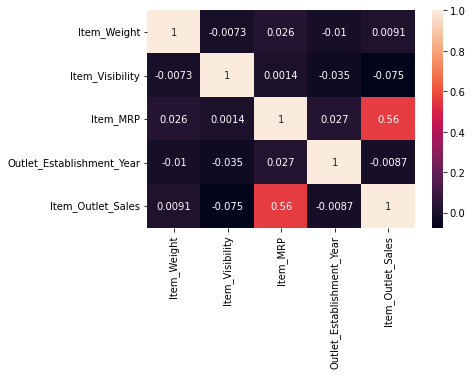

In [177]:
sns.heatmap(train.corr(), annot=True)


#Univariate Analysis


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


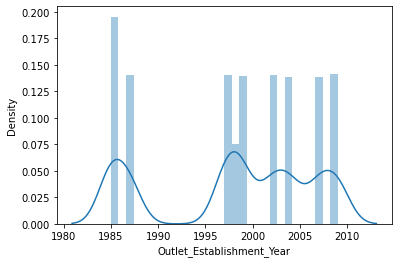

In [178]:
sns.distplot(train['Outlet_Establishment_Year'],bins=30)
#The distplot can give you a sense of the spread and shape of the data
#======

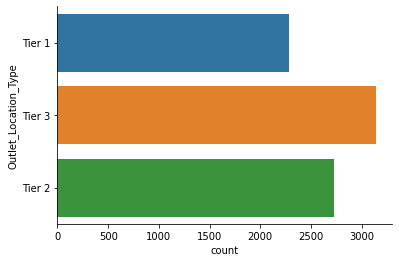

In [180]:
sns.countplot(y="Outlet_Location_Type", data = train)
sns.despine()

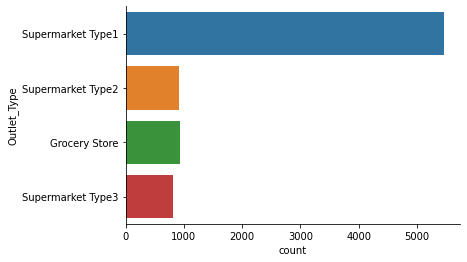

In [181]:
sns.countplot(y="Outlet_Type", data = train)
sns.despine()

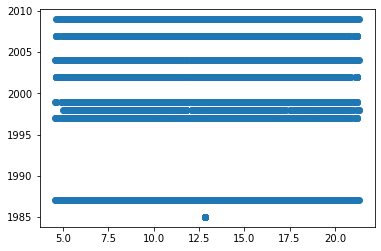

In [182]:
plt.scatter(train.Item_Weight,train['Outlet_Establishment_Year'])
plt.show()

#Bivariate

In [ ]:
sns.pairplot(data=train, x_vars=["Item_MRP","Item_Weight"], y_vars=["Item_Outlet_Sales","Outlet_Establishment_Year"])
plt.title('Sales vs Item MRP')

plt.show()


*   products with a higher price (***Item_MRP***) would have a higher weight (***Item_Weight***) and that these two variables could be correlated.

*   Older stores that have been established for a longer time would have higher sales than newer stores.


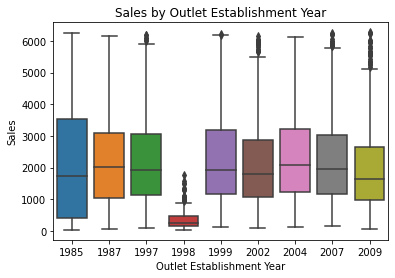

In [183]:
sns.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)

# Adding a title and labels
plt.title('Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Sales')

plt.show()

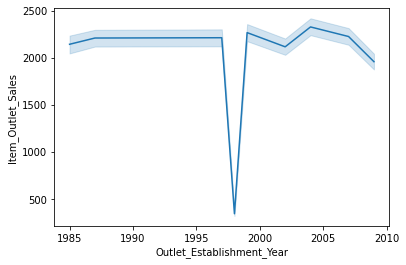

In [184]:
sns.lineplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)
plt.show()


* the decreasing trend in the line plot and box plot could suggest that fewer stores were opened in years after 2004 compared to earlier years.
 However, it's also possible that this trend is due to other factors such as store closures or changes in the way the data was collected. 

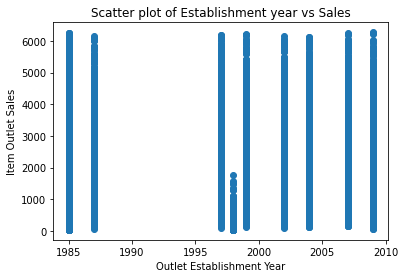

In [185]:
plt.scatter(train['Outlet_Establishment_Year'], train['Item_Outlet_Sales'])
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Item Outlet Sales')
plt.title('Scatter plot of Establishment year vs Sales')
plt.show()

# DATA CLEANING 🧹

##Handling nulls

In [103]:
#counting all Nulls
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [104]:
#filling our null value cells with mean.
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)

In [105]:
train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [106]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**Here as its shown most of the data are in "Medium" so thats our Mode. we will fill our nulls with Mode**

In [107]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
#filled all nulls with Mode (frequently repeated value)

In [108]:
#just making sure no more null values left in our dataset :)
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [109]:
train['Outlet_Size'].value_counts()


Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

"Medium" increased because we inserted mode in all missing value cells. We are Done cleaning the Data 🤙🏻

In [149]:
train.shape #==

(8523, 13)

-----

##Handling Outliers

In [156]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* for the column Item_Outlet_Sales we can see that the max value is 13086 while its mean is 2181, the mean is so small compared to the max value indicates the max value is an outlier.

In [163]:
#create a function to find outliers using IQR

def find_outliers_IQR(train):

   q1=train.quantile(0.25)

   q3=train.quantile(0.75)

   IQR=q3-q1

   outliers = train[((train<(q1-1.5*IQR)) | (train>(q3+1.5*IQR)))]

   return outliers
  
#now let us use the above function to find out outliers

outliers = find_outliers_IQR(train['Item_Outlet_Sales'])

print('number of outliers: '+ str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

number of outliers: 39
max outlier value: 6478.234
min outlier value: 6291.81


In [170]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1

train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]



<ipython-input-170-e9401c09ab22>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]


In [172]:
#i will use .describe() to verify the min and max values have been dropped as expected
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8157.000000,8157.000000,8157.000000,8157.000000,8157.000000
mean,12.862205,0.063259,138.734435,1998.088513,2068.353123
std,4.268850,0.046361,61.392110,8.285268,1475.356838
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.026814,92.714600,1987.000000,852.224000
50%,12.857645,0.052691,140.615400,1999.000000,1771.028000
75%,16.100000,0.092927,182.995000,2004.000000,3002.092200
max,21.350000,0.196660,266.888400,2009.000000,6275.165000


In [173]:
train.shape

(8157, 13)

#Encoding Categorical Variables


###Checking Categorical Features 🔤

In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical features are the ones mentioned by "object"

In [116]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [117]:
train['New_Item_Fat_Content'] = train['Item_Fat_Content'].map({'Low Fat':'Low Fat', "LF":"Low Fat" , "low fat":"Low Fat" , "Regular":"Regular" , "reg":"Regular"})

In [118]:
train.shape

(8523, 13)

* we see the it increased from 12 to 13 because we created a new column "**New_Item_Fat_Content**"

In [119]:
train["New_Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: New_Item_Fat_Content, dtype: int64

* only two categories. Perfect 🤙🏻

In [120]:
train.head()
#===

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Low Fat
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,Regular
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Fat


In [121]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

* 16 classes

In [122]:
train["Outlet_Size"].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

* it had NULL values which we already handled ✔️

In [123]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [124]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

##Now we convert the caterogical into Numerical


###Ordinal

In [125]:
import category_encoders as ce

In [126]:
#----------Outlet_Size-----------
encoder = ce.OrdinalEncoder(cols=["Outlet_Size"], mapping=[{'col':'Outlet_Size','mapping':{'High':1,"Medium":2,"Small":3}}])


In [127]:
df_train_transformed=encoder.fit_transform(train)
#we created a new dataframe here 
#dictionary

---

In [128]:
#----------Outlet_Type-----------
encoder = ce.OrdinalEncoder(cols=["Outlet_Type"], mapping=[{'col':'Outlet_Type','mapping':{'Supermarket Type1':1,"Supermarket Type2":2,"Supermarket Type3":3}}])


In [129]:
df_train_transformed2=encoder.fit_transform(df_train_transformed)
#we keep embedding the previously made dataframe in the new one 

---

In [130]:
#----------Outlet_Location_Type-----------
encoder = ce.OrdinalEncoder(cols=["Outlet_Location_Type"], mapping=[{'col':'Outlet_Location_Type',
       'mapping':{'Tier 1':1 ,"Tier 2":2 ,"Tier 3":3}}])

In [131]:
df_train_transformed3=encoder.fit_transform(df_train_transformed2)


---

In [132]:
df_train_transformed3.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Fat_Content
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,1.0,3735.1380,Low Fat
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,2.0,443.4228,Regular
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,1.0,2097.2700,Low Fat


* Our modifications are shown in above diagram. The strings are changed into Numbers 
* we used Ordinal mapping here because our variables were in ordered way. this is good when they need prioritization

###Nominal

In [133]:
 data_encoded = pd.get_dummies(data=df_train_transformed3['New_Item_Fat_Content'],drop_first=True)

* we used "New_Item_Fat_Content" because its modified by us earlier , excluded the repeated values

In [134]:
data_encoded

,Regular
0,0
1,1
2,0
3,1
4,0
...,...
8518,0
8519,1
8520,0
8521,1


In [135]:
df_train_transformed3["Numbered_Item_Fat_Content"]=data_encoded

In [136]:
df_train_transformed3.shape

(8523, 14)

* since we added a new column **Numbered_Item_Fat_Content** . so it increased the number of columns to 14

---

In [137]:
df_train_transformed3["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [138]:
data_encoded_1 = pd.get_dummies(data=df_train_transformed3['Item_Type'],drop_first=True)
data_encoded_1.head(3)

,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [139]:
data_encoded_1.shape

(8523, 15)

In [140]:
df_train_transformed3 = df_train_transformed3.join(data_encoded_1)
#added columns 

In [141]:
df_train_transformed3.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2,3,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2,1,...,0,0,0,0,1,0,0,0,0,0


###Dropping Unnecessary Columns 🗑

In [142]:
df_train_transformed3.drop(["Item_Identifier","Outlet_Identifier","Item_Fat_Content","Item_Type","New_Item_Fat_Content"], axis=1, inplace=True)

In [143]:
df_train_transformed3

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Numbered_Item_Fat_Content,Breads,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.300,0.016047,249.8092,1999,2,1,1.0,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,0.019278,48.2692,2009,2,3,2.0,443.4228,1,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0.016760,141.6180,1999,2,1,1.0,2097.2700,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,0.000000,182.0950,1998,2,3,-1.0,732.3800,1,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.000000,53.8614,1987,1,3,1.0,994.7052,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,1,3,1.0,2778.3834,0,0,...,0,0,0,0,0,0,0,1,0,0
8519,8.380,0.046982,108.1570,2002,2,2,1.0,549.2850,1,0,...,0,0,0,0,0,0,0,0,0,0
8520,10.600,0.035186,85.1224,2004,3,2,1.0,1193.1136,0,0,...,0,0,1,0,0,0,0,0,0,0
8521,7.210,0.145221,103.1332,2009,2,3,2.0,1845.5976,1,0,...,0,0,0,0,0,0,0,1,0,0


* Columns were 29 so we dropped 5 unneeded columns. Now we are left with 24 columns

In [144]:
df_train_transformed3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Size                8523 non-null   int64  
 5   Outlet_Location_Type       8523 non-null   int64  
 6   Outlet_Type                8523 non-null   float64
 7   Item_Outlet_Sales          8523 non-null   float64
 8   Numbered_Item_Fat_Content  8523 non-null   uint8  
 9   Breads                     8523 non-null   uint8  
 10  Breakfast                  8523 non-null   uint8  
 11  Canned                     8523 non-null   uint8  
 12  Dairy                      8523 non-null   uint8  
 13  Frozen Foods               8523 non-null   uint8

**No more "object" type columns 😮‍💨**

#Train Test Split

In [145]:
X= df_train_transformed3.drop("Item_Outlet_Sales",axis=1)
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,9.30,0.016047,249.8092,1999,2,1,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,2009,2,3,2.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,1999,2,1,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,1998,2,3,-1.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,1987,1,3,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


* dropped Item_outlet_sales out of the dataframe. hence we left with 23 columns

In [146]:
y = df_train_transformed3["Item_Outlet_Sales"]
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

##Importing X_Train Test split

In [189]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.33,random_state=42)

In [190]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,12.857645,0.031187,39.5480,1985,2,3,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2206,12.650000,0.076199,191.3846,2002,2,2,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
170,14.500000,0.019472,164.8210,2004,3,2,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6526,12.857645,0.057762,237.3564,1985,2,3,3.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
135,7.235000,0.076856,116.0492,1997,3,1,1.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,9.395000,0.286345,139.1838,1998,2,3,-1.0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5191,15.600000,0.117575,75.6670,2007,2,2,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5390,17.600000,0.018944,237.3590,2002,2,2,1.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,20.350000,0.054363,117.9466,2007,2,2,1.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#Feature Scaling

In [191]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
norm= MinMaxScaler().fit(X_train)
X_train_norm= norm.transform(X_train)
X_train.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,12.857645,0.031187,39.5480,1985,2,3,3.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2206,12.650000,0.076199,191.3846,2002,2,2,1.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
170,14.500000,0.019472,164.8210,2004,3,2,1.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [196]:
print(X_train_norm)

[[0.4943522  0.09496851 0.03505117 ... 0.         0.         0.        ]
 [0.48198869 0.23203687 0.67952329 ... 0.         0.         0.        ]
 [0.59214052 0.05929423 0.5667738  ... 0.         0.         0.        ]
 ...
 [0.77671926 0.05768632 0.87466214 ... 0.         0.         0.        ]
 [0.94045847 0.16554261 0.36781489 ... 1.         0.         0.        ]
 [0.70229235 0.05174687 0.27356298 ... 0.         0.         0.        ]]


In [201]:
scaled_feature_df= pd.DataFrame(X_train_norm, index=X_train.index,columns=X_train.columns)

In [203]:
scaled_feature_df.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,0.494352,0.094969,0.035051,0.000000,0.5,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2206,0.481989,0.232037,0.679523,0.708333,0.5,0.5,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.592141,0.059294,0.566774,0.791667,1.0,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


* **Finally our numbers are ranged 🥳**

In [204]:
scaled_feature_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,...,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,0.498693,0.199803,0.469522,0.535398,0.585377,0.561033,0.521585,0.350613,0.026620,0.013310,...,0.149912,0.026795,0.062347,0.110508,0.046760,0.020315,0.006655,0.139755,0.051138,0.019615
std,0.251233,0.155285,0.266125,0.349607,0.300385,0.405121,0.256045,0.477204,0.160984,0.114609,...,0.357017,0.161498,0.241805,0.313549,0.211143,0.141089,0.081313,0.346763,0.220299,0.138684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.294433,0.082066,0.266783,0.083333,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.163161,0.477889,0.583333,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.687407,0.286557,0.660129,0.791667,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* all columns minimum is zero
* all columns maximum is one 

In [206]:
X_train = scaled_feature_df

In [208]:
X_train

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
3288,0.494352,0.094969,0.035051,0.000000,0.5,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2206,0.481989,0.232037,0.679523,0.708333,0.5,0.5,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.592141,0.059294,0.566774,0.791667,1.0,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6526,0.494352,0.175895,0.874651,0.000000,0.5,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
135,0.159571,0.234037,0.359761,0.500000,1.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.288181,0.871963,0.457956,0.541667,0.5,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.657636,0.358032,0.188359,0.916667,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.776719,0.057686,0.874662,0.708333,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.940458,0.165543,0.367815,0.916667,0.5,0.5,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


##Scale X_Test

In [214]:
norm= MinMaxScaler().fit(X_test)
X_test_norm= norm.transform(X_test)


In [216]:
scaled_feature_df_2= pd.DataFrame(X_test_norm, index=X_test.index,columns=X_test.columns)

In [217]:
scaled_feature_df_2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,...,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000
mean,0.484467,0.209223,0.456480,0.533164,0.585496,0.547103,0.512353,0.356914,0.035194,0.012087,...,0.133665,0.021685,0.058301,0.099182,0.056168,0.018841,0.009243,0.142908,0.054390,0.012798
std,0.252775,0.164412,0.261730,0.347284,0.299768,0.408832,0.256587,0.479174,0.184302,0.109293,...,0.340353,0.145679,0.234353,0.298960,0.230286,0.135988,0.095711,0.350041,0.226827,0.112421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.269093,0.084398,0.261222,0.083333,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.493296,0.169299,0.462372,0.583333,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.671838,0.300414,0.644241,0.791667,1.000000,1.000000,0.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [218]:
X_test=scaled_feature_df_2

In [219]:
X_test.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Numbered_Item_Fat_Content,Breads,Breakfast,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
7503,0.579356,0.081901,0.201879,0.083333,0.0,1.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2957,0.199284,0.221528,0.045282,0.500000,1.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7031,0.591289,0.128655,0.042454,0.583333,0.5,0.0,0.5,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

#MODELLING

###Linear regression

In [220]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)


In [221]:
y_pred=reg.predict(X_test)


In [222]:
from sklearn.metrics import mean_squared_error

In [223]:
mean_squared_error(y_test,y_pred,squared=False)

1144.5873822446392

---


###Regularized Linear Regression

In [263]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)


In [264]:
ridge_reg.fit(X_train, y_train)


Ridge(alpha=0.5)

In [265]:
y_pred1 = ridge_reg.predict(X_test)


In [267]:
result = mean_squared_error(y_test, y_pred1, squared=False)
result



1144.4943522740186

---


###RandomForest



In [244]:
from sklearn.ensemble import RandomForestRegressor


In [256]:
rf = RandomForestRegressor(n_estimators=100)


In [257]:
rf.fit(X_train, y_train)


RandomForestRegressor()

In [258]:
y_pred2 = rf.predict(X_test)


In [262]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred2))

Mean Squared Error: 1159142.782516703
R2 Score: 0.5557193533819762


---


###XGBOOST


In [272]:
import xgboost as xgb

# Create the XGBoost model
xgb_model = xgb.XGBRegressor()

# Train the model using the training data
xgb_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred4 = xgb_model.predict(X_test)

# Calculate the model's performance using mean squared error


print("Mean Squared Error:", mean_squared_error(y_test, y_pred4))
print("R2 Score:", r2_score(y_test, y_pred4))


[08:19:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error: 1129012.4416565828
R2 Score: 0.5971734834042854
